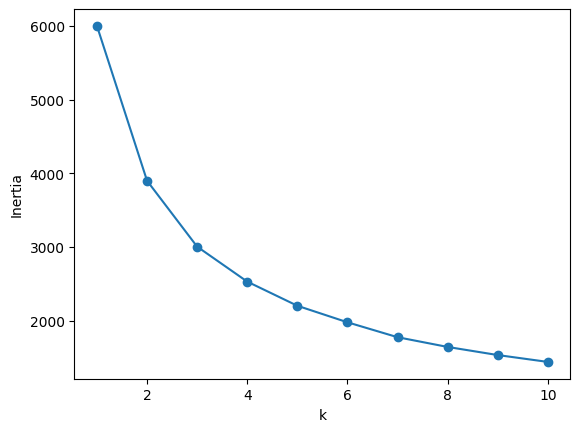

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load data
df = pd.read_csv('songs_normalize.csv')

# Select features
features = ['danceability', 'energy', 'loudness']
X = df[features].dropna()
df = df.loc[X.index]

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow Method
inertias = []
k_range = range(1, 11)
for k in k_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertias.append(km.inertia_)
plt.plot(k_range, inertias, 'o-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

   danceability    energy  loudness
0      0.509600  0.799593 -4.820045
1      0.616714  0.487232 -8.561732
2      0.727003  0.832824 -4.155713
3      0.766256  0.645467 -6.076379
['All The Small Things', "It's My Life"]
['Breathe', 'Desert Rose']
['Oops!...I Did It Again', 'Bye Bye Bye']
['The Real Slim Shady', "L'Amour Toujours"]


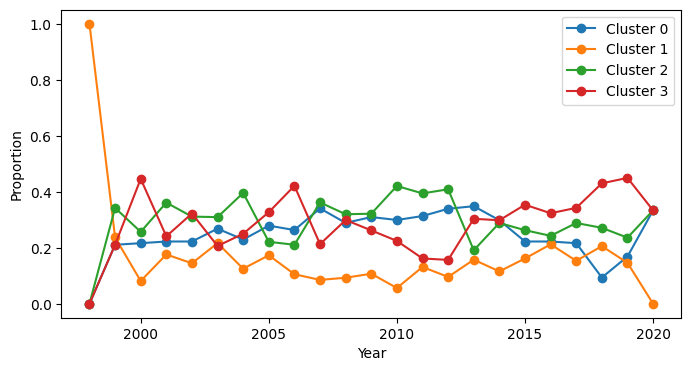

In [24]:
# Fit K-Means
k = 4
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Cluster centers (original scale)
centers = scaler.inverse_transform(kmeans.cluster_centers_)
centers_df = pd.DataFrame(centers, columns=features)
print(centers_df)

# Sample tracks per cluster
title_col = 'song'
for c in range(k):
    print(df[df['cluster'] == c][title_col].head(2).tolist())

# Trend over time
year_counts = df.groupby(['year', 'cluster']).size().unstack(fill_value=0)
year_props = year_counts.div(year_counts.sum(axis=1), axis=0)

plt.figure(figsize=(8, 4))
for c in year_props.columns:
    plt.plot(year_props.index, year_props[c], marker='o', label=f'Cluster {c}')
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.legend()
plt.show()